In [9]:
import numpy as np

In [1]:
from dtw_mean import dtw, ssg
from loaddataset import loaddataset

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from collections import Counter, namedtuple

In [50]:
current_palette = sns.color_palette('tab10',14)

In [30]:
def loaddataset(name, train_suffix='_TRAIN.tsv', test_suffix='_TEST.tsv'):
    data = np.loadtxt('UCRArchive_2018/{0}/{0}{1}'.format(name, train_suffix), delimiter='\t')
    test_data = np.loadtxt('UCRArchive_2018/{0}/{0}{1}'.format(name, test_suffix), delimiter='\t')

    # get labels
    min_label = min(data[:,0])
    labels = np.array(data[:,0], dtype=int) - min_label
    min_label = min(test_data[:,0])
    test_labels = np.array(test_data[:,0], dtype=int) - min_label

    # remove labels
    data = data[:,1:]
    test_data = test_data[:,1:]
    class_dist = Counter(labels)

    print('Dataset {} has been loaded with class distribution of: {}, test:{}'.format(name, class_dist, len(test_labels)))
    K = len(class_dist)
    T = data.shape[1]
    N = len(data)

    r = namedtuple('dataset', 'data, labels, class_dist, test_data, test_labels, T, N, K')
    return r(data, labels, class_dist, test_data, test_labels, T, N, K)

In [31]:
EXTdatasetname="Chinatown"
EXTdataset = loaddataset(name=EXTdatasetname,train_suffix="_TRAIN.tsv", test_suffix='_TEST.tsv')

Dataset Chinatown has been loaded with class distribution of: Counter({0.0: 10, 1.0: 10}), test:343


In [32]:
ORGdatasetname="Chinatown"
ORGdataset = loaddataset(ORGdatasetname)

Dataset Chinatown has been loaded with class distribution of: Counter({0.0: 10, 1.0: 10}), test:343


In [33]:
ORGdataset.class_dist

Counter({0.0: 10, 1.0: 10})

In [34]:
ORGdataset.N, ORGdataset.T, ORGdataset.K, ORGdataset.class_dist

(20, 24, 2, Counter({0.0: 10, 1.0: 10}))

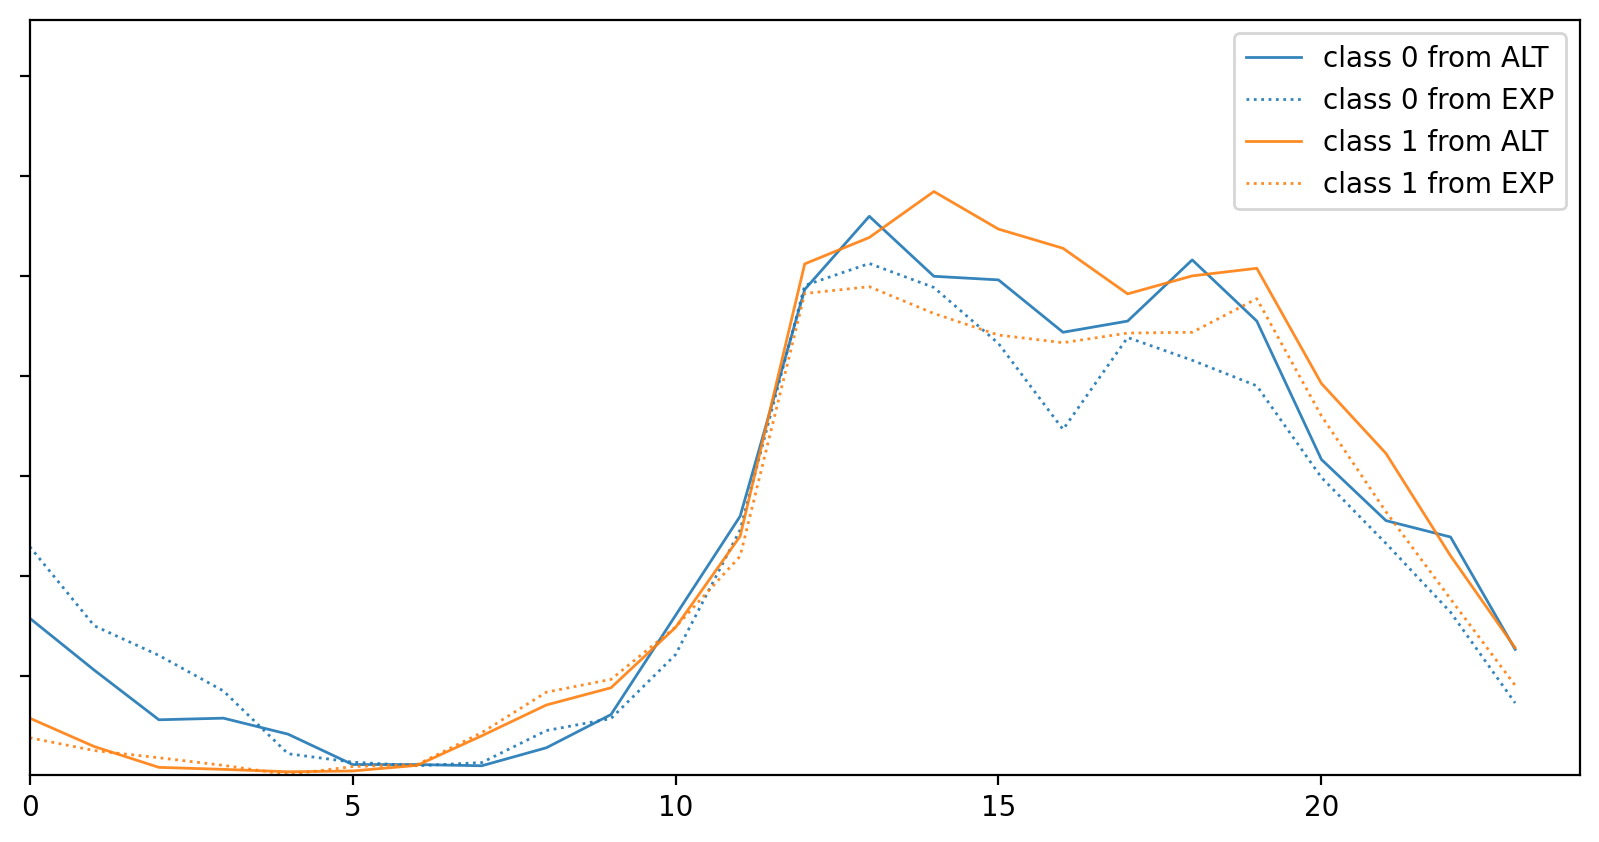

In [56]:
fig = plt.figure(figsize=(10,5), dpi=200)
ax = fig.add_subplot(1, 1, 1)
ax.yaxis.set_major_formatter(plt.NullFormatter())
#list(fdist1.keys())
itr=ORGdataset.class_dist.keys()
itr=list(itr)
for label in itr[:20]:
    xaxis = np.arange(0,ORGdataset.T)
    l_data = ORGdataset.data[ORGdataset.labels == label]
    r_ind = np.random.randint(0,len(l_data))
    r_data = l_data[r_ind]
    plt.plot(xaxis, r_data, c=current_palette[int(label)], lw=1, ls='-', alpha=0.9, label='class {} from ALT'.format(int(label)))
    
    xaxis = np.arange(0,EXTdataset.T)
    l_data = EXTdataset.data[EXTdataset.labels == label]
    r_ind = np.random.randint(0,len(l_data))
    r_data = l_data[r_ind]
    plt.plot(xaxis, r_data, c=current_palette[int(label)], lw=1, ls=':', alpha=0.9, label='class {} from EXP'.format(int(label)))
plt.axis([0, ORGdataset.T, np.min(ORGdataset.data), np.max(ORGdataset.data)])    
legend = plt.legend(bbox_to_anchor=(1, 1))
plt.show()

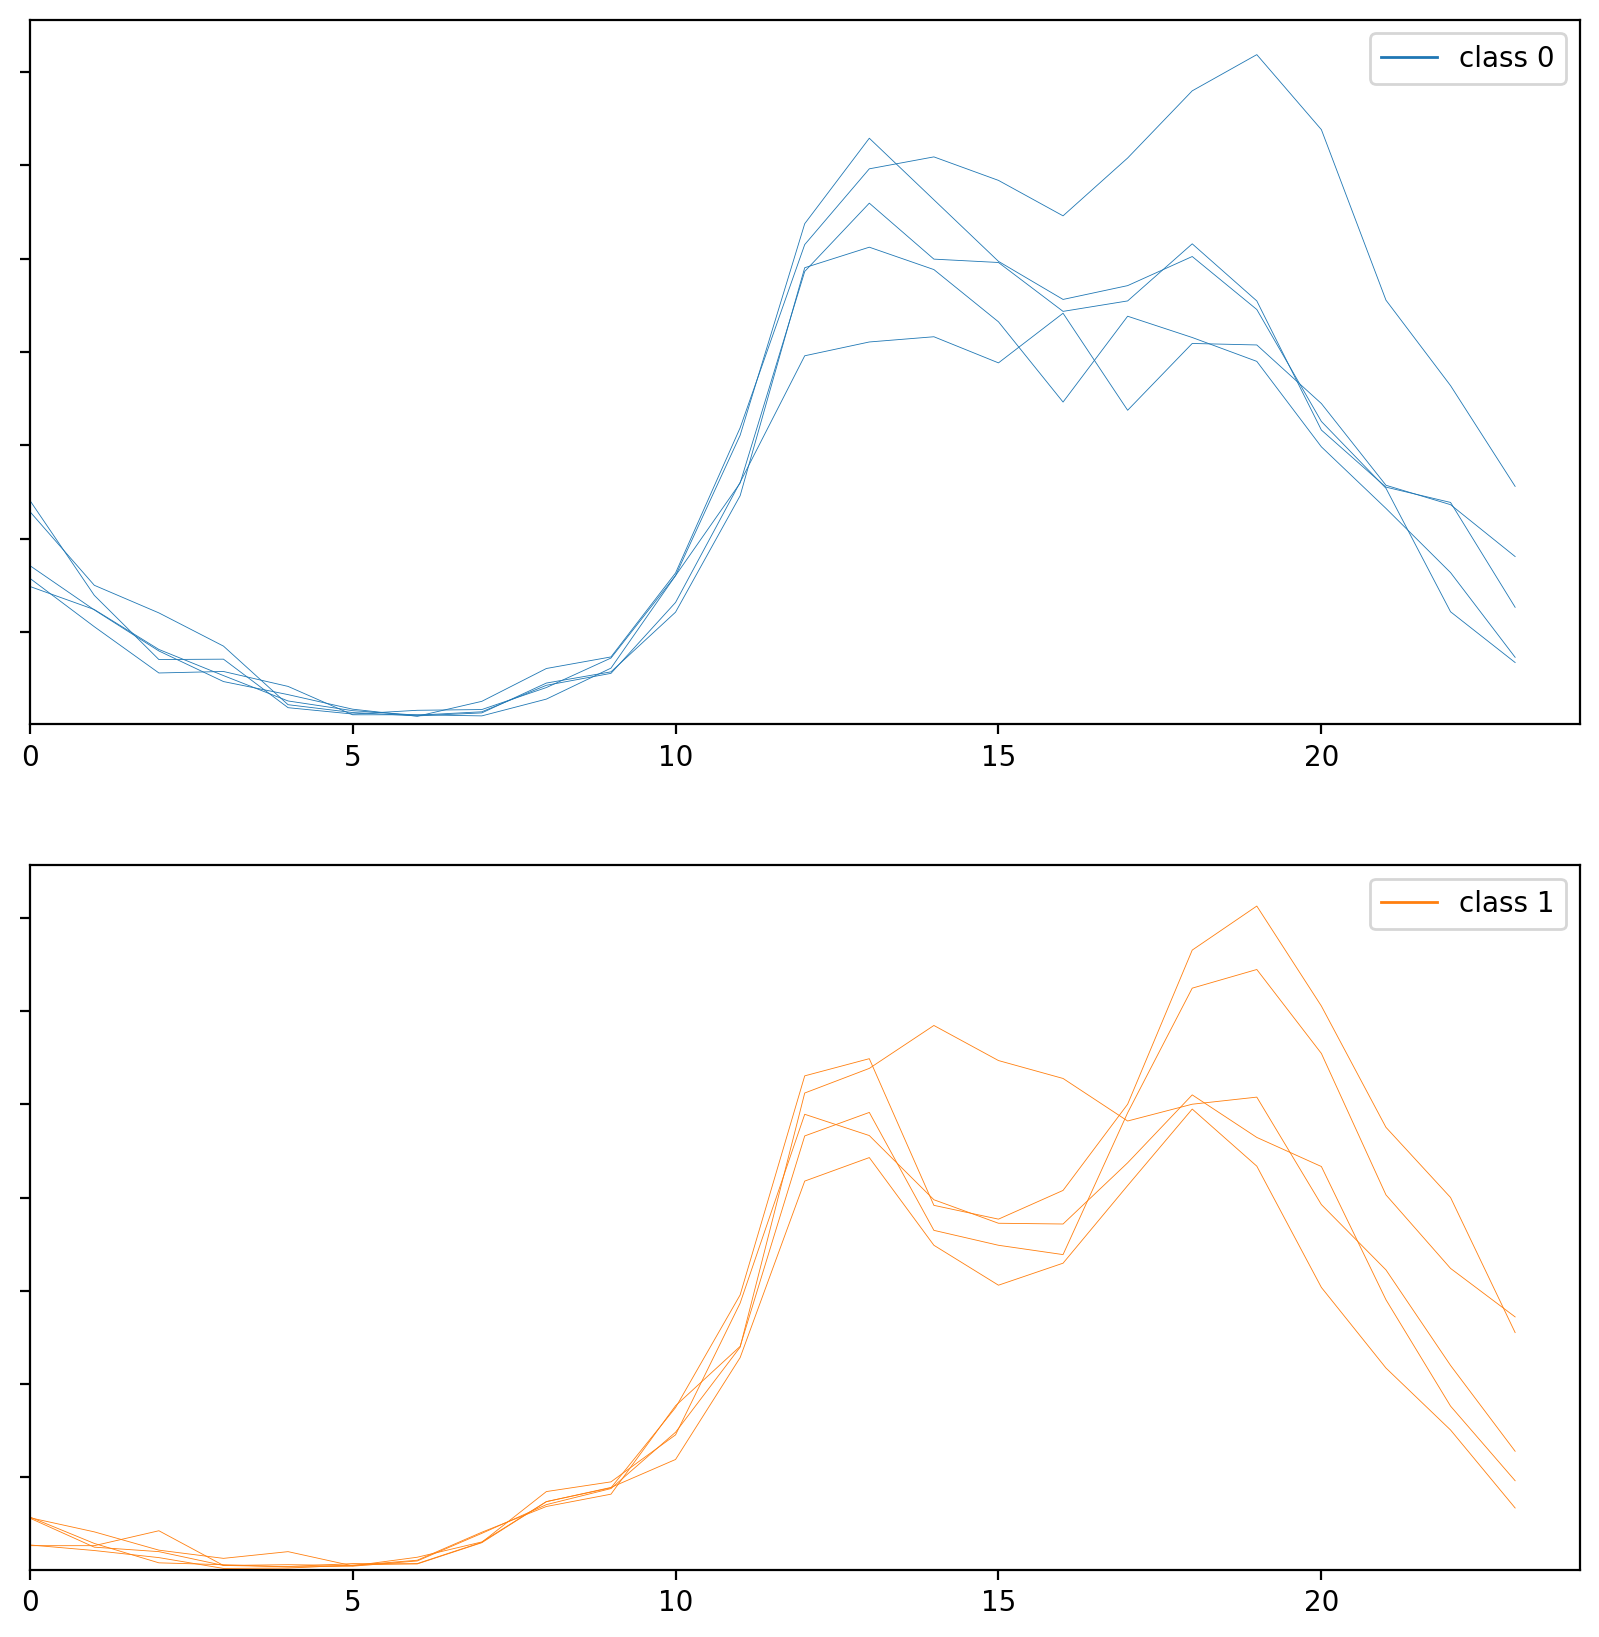

In [43]:
dataset = ORGdataset
xaxis = np.arange(0,dataset.T)

fig = plt.figure(2,figsize=(10,5*dataset.K),dpi=200)
itr=dataset.class_dist.keys()
itr=list(itr)
fig.subplots_adjust(top=.9)
for i, label in enumerate(itr[:3]):
    ax = plt.subplot(dataset.K,1,i+1)
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    plt.plot(xaxis, dataset.data[dataset.labels == label].T[:,:5], c=current_palette[int(label)], alpha=1, lw=0.3)
    plt.plot([], [], c=current_palette[int(label)], alpha=1, lw=1, label='class {}'.format(int(label)))
    plt.axis([0, dataset.T, np.min(dataset.data), np.max(dataset.data)])
    plt.legend()
    
plt.show()

In [45]:
pip install fastdtw

     |████████████████████████████████| 133 kB 1.4 MB/s eta 0:00:01
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp38-cp38-macosx_10_9_x86_64.whl size=98963 sha256=0018b5915d8b9ef982e08196e81af9bf1843c05e0276ee2bea5492bb480d5d48
  Stored in directory: /Users/silaruddin/Library/Caches/pip/wheels/e9/ac/30/c962f9d759dd68cb5482727c44441fdfb48040fdbe983857e8
Successfully built fastdtw
Note: you may need to restart the kernel to use updated packages.


In [46]:
from spawn import *

100%|██████████| 2/2 [00:00<00:00, 1876.23it/s]

1 [-1 -1 -1 -1  8  8 -1 -1 -1 -1]


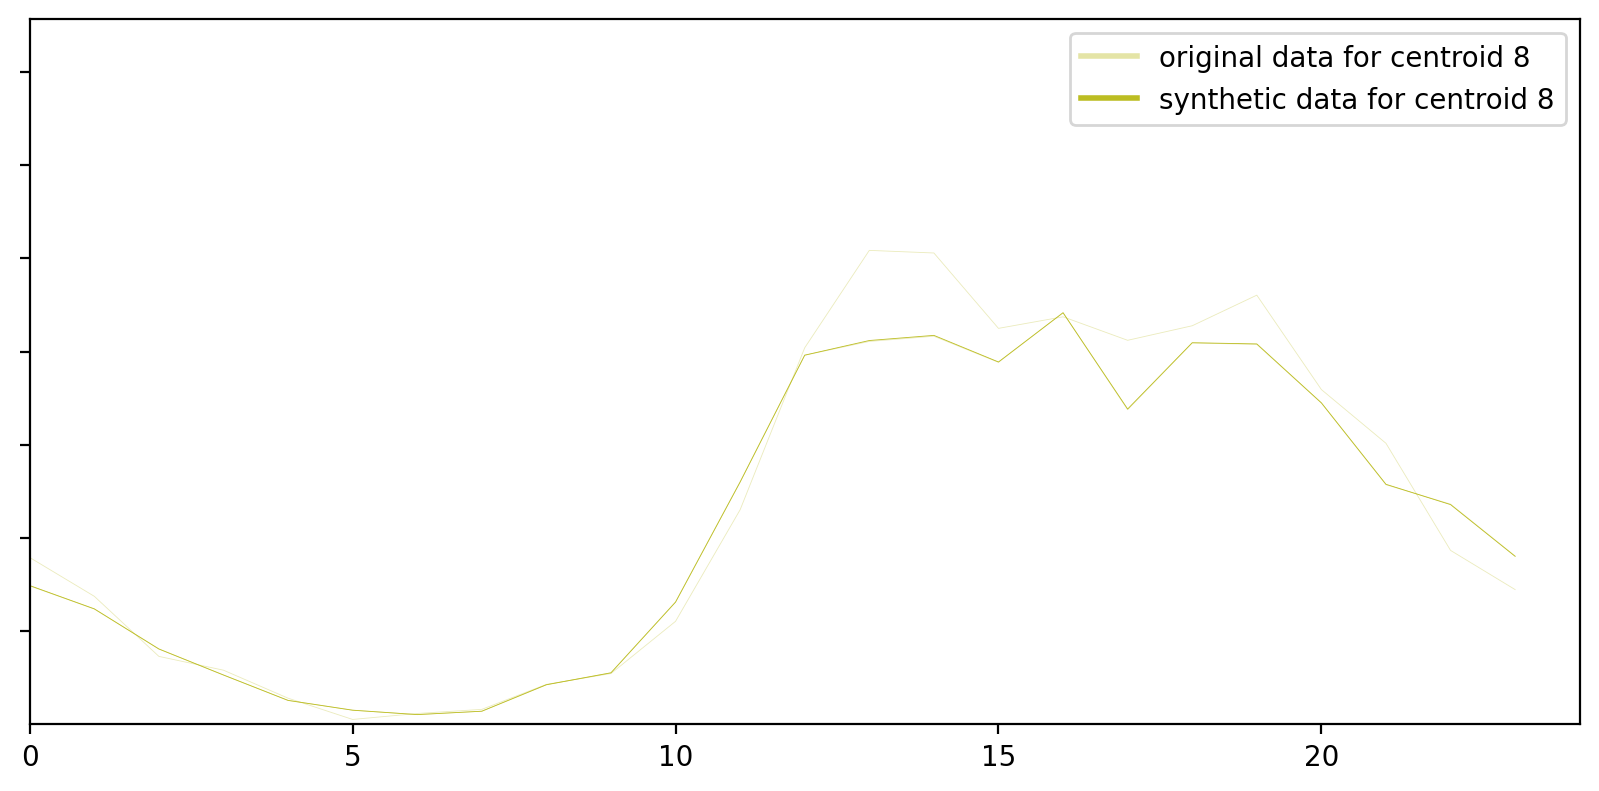

In [52]:
plt.figure(figsize=(10,5*dataset.K),dpi=200)
xaxis = np.arange(0,dataset.T)
plt.subplots_adjust(top=.9)
itr=dataset.class_dist.keys()
itr=list(itr)
for i, label in enumerate(itr[:1]):
    l_data = dataset.data[dataset.labels==label]
    ax = plt.subplot(dataset.K*100+10+i+1)
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    new_clusters, alloc = create_new_data(l_data, 9, ssg_epochs=1, k=1)
    print(len(new_clusters), alloc)
    ci = 0
    for i in range(max(alloc)+1):
        if not l_data[alloc==i].size: continue
        plt.plot(xaxis, l_data[alloc==i].T, c=current_palette[i], alpha=0.3, lw=.3)
        plt.plot([],[], c=current_palette[i], alpha=0.4, lw=2, label='original data for centroid {}'.format(int(i)))
        plt.plot(xaxis, new_clusters[ci].T, c=current_palette[i], alpha=1, lw=0.3)
        plt.plot([],[], c=current_palette[i], alpha=1, lw=2, label='synthetic data for centroid {}'.format(int(i)))
        ci+=1
    plt.axis([0, dataset.T, np.min(dataset.data), np.max(dataset.data)])
    plt.legend()
plt.show()

In [53]:
len(current_palette)

14

100%|██████████| 1002/1002 [00:00<00:00, 7158.26it/s]


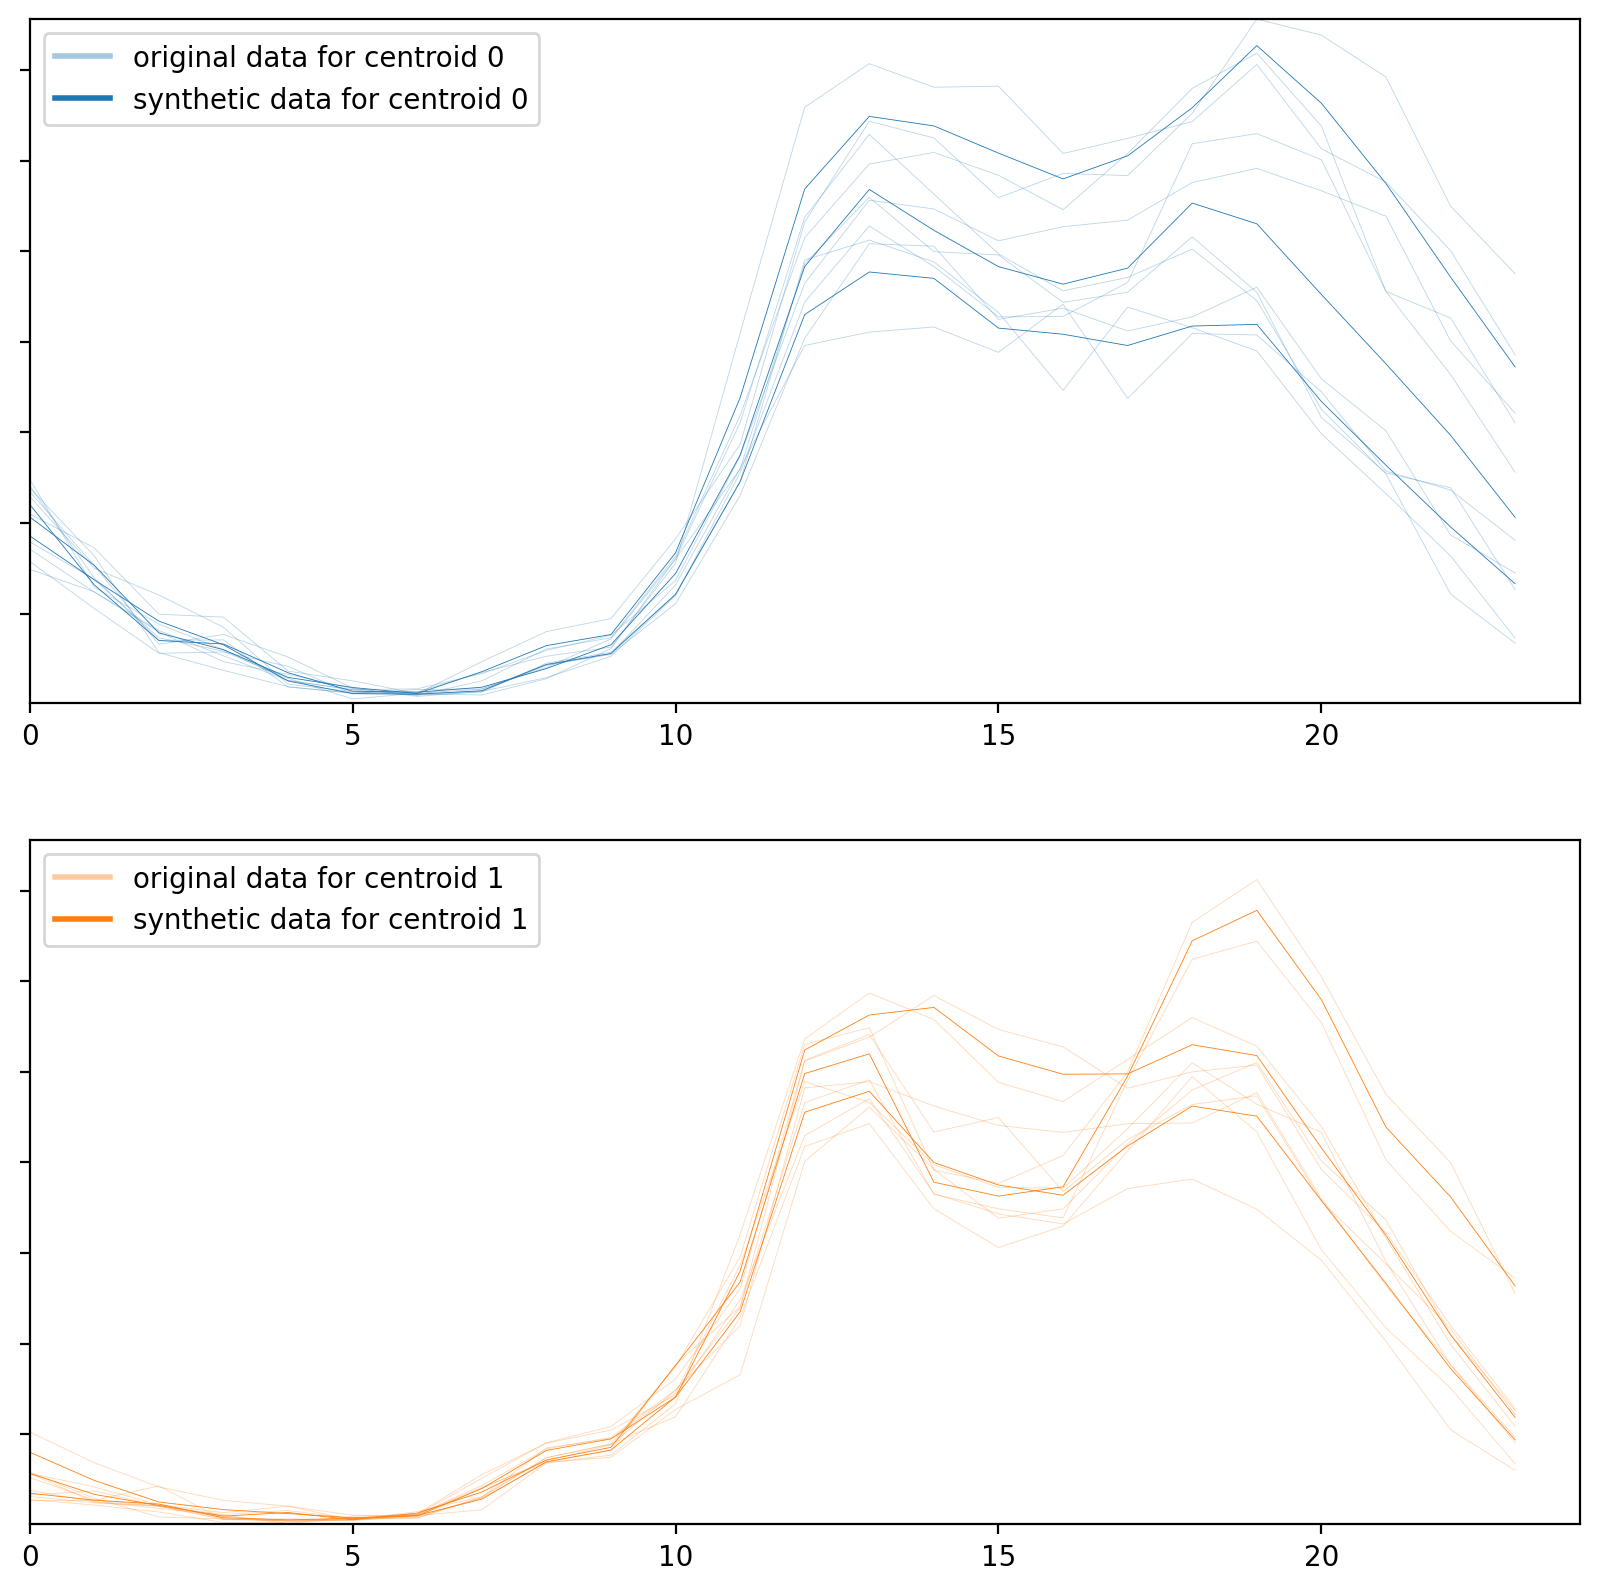

In [55]:
plt.figure(figsize=(10,5*3),dpi=200)
xaxis = np.arange(0,ORGdataset.T)
plt.subplots_adjust(top=.9)
itr=ORGdataset.class_dist.keys()
itr=list(itr)
for i, label in enumerate(itr[:3]):
    l_data = ORGdataset.data[ORGdataset.labels==label]
    ax = plt.subplot(3*100+10+i+1)
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    new_clusters, _ = create_new_data(l_data, 3)
    plt.plot(xaxis, l_data.T, c=current_palette[i], alpha=0.3, lw=.3)
    plt.plot([],[], c=current_palette[i], alpha=0.4, lw=2, label='original data for centroid {}'.format(int(i)))
    plt.plot(xaxis, new_clusters.T, c=current_palette[i], alpha=1, lw=0.3)
    plt.plot([],[], c=current_palette[i], alpha=1, lw=2, label='synthetic data for centroid {}'.format(int(i)))
    plt.axis([0, ORGdataset.T, np.min(ORGdataset.data), np.max(ORGdataset.data)])
    plt.legend()
plt.show()